USED PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('courses.csv', index_col=0)
#print(df)

has_nulls = df.isnull().any()
print(has_nulls)


Course_Name            False
Category               False
Duration (hours)       False
Enrolled_Students      False
Completion_Rate (%)    False
Platform               False
Price ($)              False
Rating (out of 5)      False
dtype: bool


looking if there are any duplicates based on the name of the course

In [3]:
course_counts = df['Course_Name'].value_counts()

duplicates = course_counts[course_counts > 1]
print(duplicates)

Series([], Name: count, dtype: int64)


looking for outliers on each numerical column;
a value is an outlier if its value is lower than q1-1.5*iqr or higher than q3+1.5*iqr

In [4]:
outliers_dict = {}

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    
    outliers_dict[column] = outliers

for col, outliers in outliers_dict.items():
    print(f"Outliers for {col}:\n{outliers}\n")

Outliers for Duration (hours):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Enrolled_Students:
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Completion_Rate (%):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Price ($):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Rating (out of 5):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []



bpx plot for every numerical data for a better visualisation

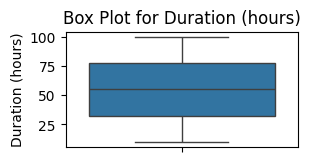

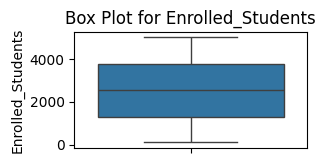

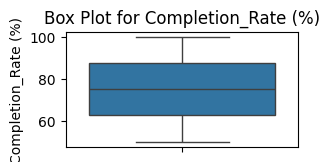

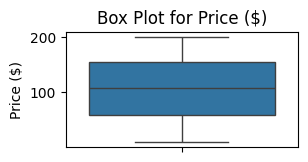

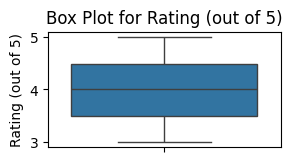

In [5]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_cols:
    plt.figure(figsize=(3, 1.5))
    sns.boxplot(y=df[column])  
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()

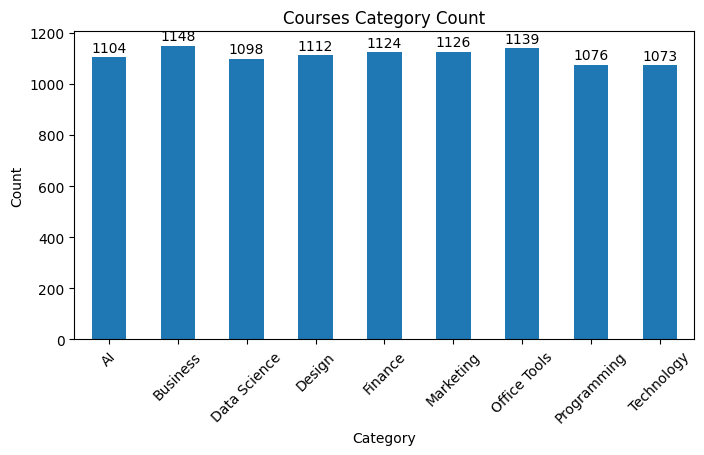

In [28]:
category = df.groupby('Category')['Category'].count()

plt.figure(figsize=(8, 4))
for i, v in enumerate(category.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')
category.plot(kind='bar')
plt.title('Courses Category Count')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



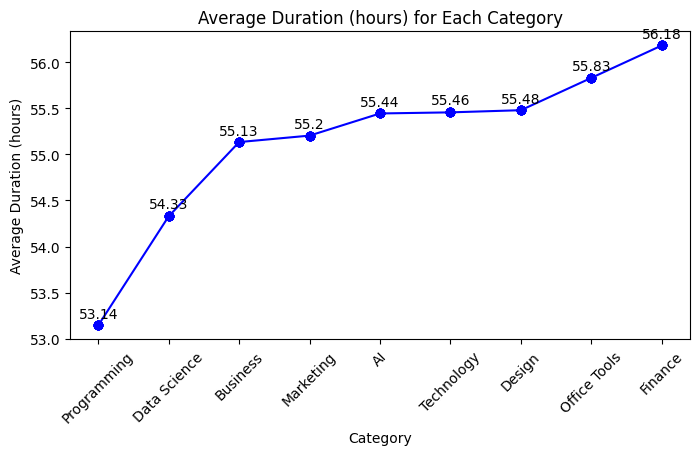

In [ ]:
avg_duration = df.groupby('Category')['Duration (hours)'].mean().sort_values(ascending=True)

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_duration.values):
    plt.text(i, round(v, 2) + .05, str(round(v, 2)), ha='center', va='bottom')
    plt.plot(avg_duration.index, avg_duration.values, 'o', color='blue')
avg_duration.plot(kind='line', color='blue')
plt.title('Average Duration (hours) for Each Category')
plt.xlabel('Category')
plt.ylabel('Average Duration (hours)')
plt.xticks(rotation=45)
plt.show()

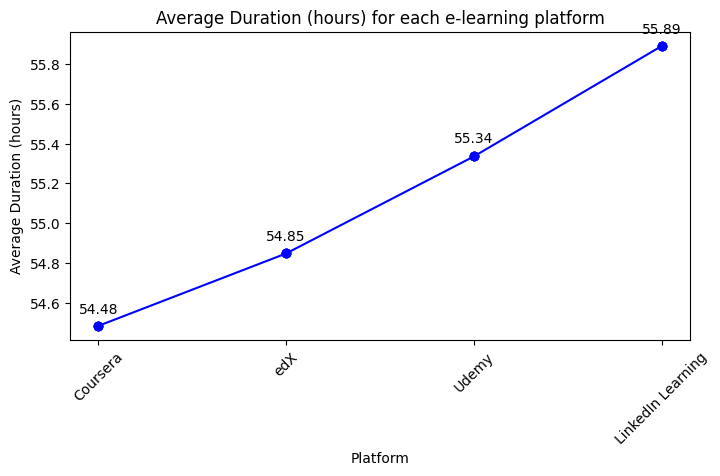

In [ ]:
avg_duration = df.groupby('Platform')['Duration (hours)'].mean().sort_values(ascending=True)

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_duration.values):
    plt.text(i, round(v, 2) + .05, str(round(v, 2)), ha='center', va='bottom')
    plt.plot(avg_duration.index, avg_duration.values, 'o', color='blue')
avg_duration.plot(kind='line', color='blue')
plt.title('Average Duration (hours) for each e-learning platform')
plt.xlabel('Platform')
plt.ylabel('Average Duration (hours)')
plt.xticks(rotation=45)
plt.show()

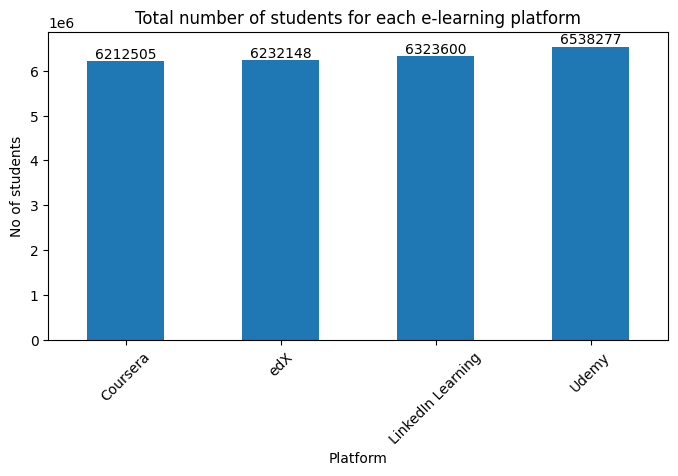

In [ ]:
avg_enrolled_stud = df.groupby('Platform')['Enrolled_Students'].sum().sort_values(ascending=True)

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_enrolled_stud.values):
    plt.text(i, v + .05, str(v), ha='center', va='bottom')
avg_enrolled_stud.plot(kind='bar')
plt.title('Total number of students for each e-learning platform')
plt.xlabel('Platform')
plt.ylabel('No of students')
plt.xticks(rotation=45)
plt.show()

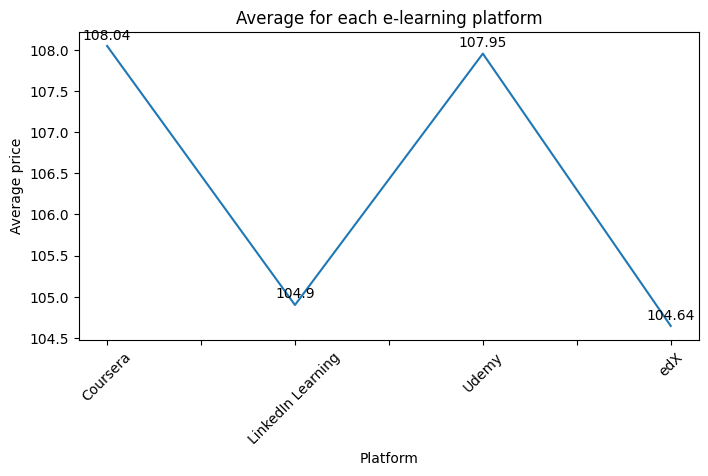

In [ ]:
avg_price = df.groupby('Platform')['Price ($)'].mean()

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_price.values):
    plt.text(i, round(v,2) + .05, str(round(v, 2)), ha='center', va='bottom')
avg_price.plot(kind='line')
plt.title('Average for each e-learning platform')
plt.xlabel('Platform')
plt.ylabel('Average price')
plt.xticks(rotation=45)
plt.show()

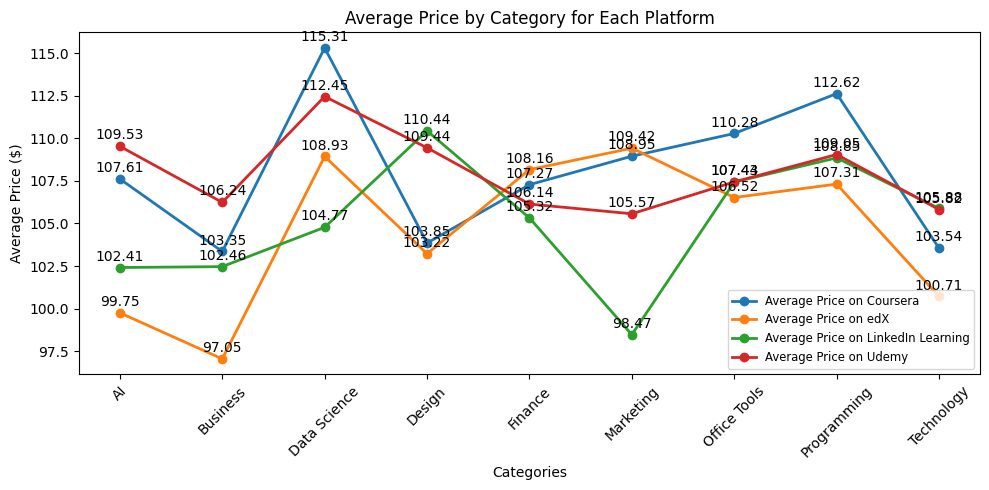

In [ ]:
unique_platforms = df['Platform'].unique()

plt.figure(figsize=(10, 5))

for platform in unique_platforms:
    platform_price = df[df['Platform'] == platform].groupby('Category')['Price ($)'].mean()
    line_plot = platform_price.plot(kind='line', marker='o', linewidth=2, label=f'Average Price on {platform}')
    for i, v in enumerate(platform_price):
        line_plot.annotate(f'{v:.2f}', xy=(i, v), xytext=(0, 5), textcoords='offset points', ha='center')

plt.title('Average Price by Category for Each Platform')
plt.xlabel('Categories')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(fontsize='small', loc='lower right')
plt.show()


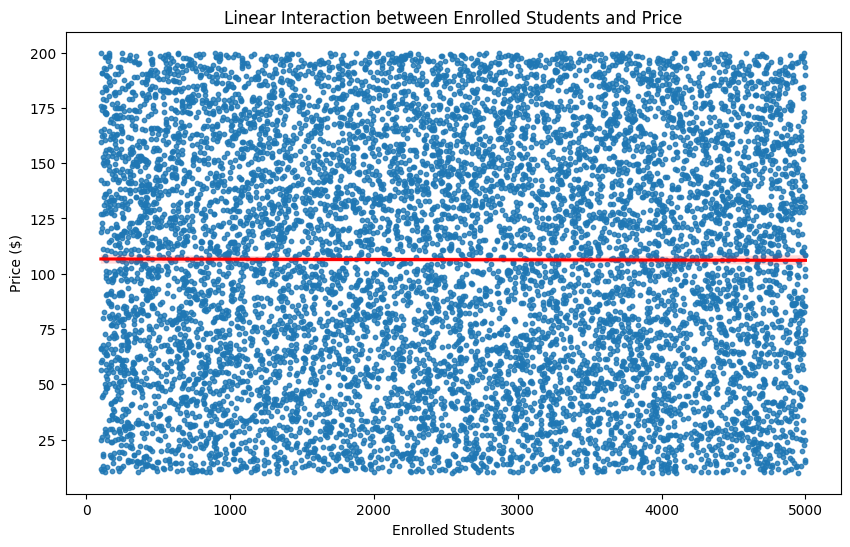

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Enrolled_Students', y='Price ($)', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Linear Interaction between Enrolled Students and Price')
plt.xlabel('Enrolled Students')
plt.ylabel('Price ($)')
plt.show()